<div style="text-align: right;">
<a target="_blank" href="https://colab.research.google.com/github/hkaragah/hkaragah.github.io/blob/main/structure/moment_curvature/steel_w_sec_moment_curvature.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<div style="font-size: 0.8em; color: #555;">By Hossein Karagah</div>
<div style="font-size: 0.8em; color: #555;">© Copyright 2025 GNU GENERAL PUBLIC LICENSE.</div>
</div>

# P-M Interaction Diagram

The diagram shows how much moment capacity a beam/column can carry while it is under different levels of axial force, and vice versa. The diagram is usually plotted with the axial force on the vertical axis and moment on the horizontal axis. There are some special points on the diagram including:

---

* __Point of Pure Compression ($P_o$):__

    <div style="text-align: center"><img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_04.jpg" width=1000 alt="Stress and strain diagrams at pure compression"></div>
    
    This point corresponds to maximum compressive capacity ($P_o$) of the section with no moment capacity. The concrete and steel are both in compression. The concrete attains its ultimate compressive strain ($\epsilon_{c}=\epsilon_{cu}=0.003$ per ACI 318-25 §22.2.2.1). The maximum compressive capacity for non-prestressed members is calculated per ACI 318-25 §22.4.2.2 as:

    $$P_o=0.85f'_c(A_g-\sum_{i=1}^{n} A_{si})+f_y \sum_{i=1}^{n} A_{si}$$

    where:
    
    * $f'_c$ is the specified compressive strength of concrete in psi.
    * $f_y$ is the specified yield strength of non-prestressed reinforcement in psi, limited to 80,000 psi per ACI 318-25 §22.4.2.1.
    * $A_g$ is gross concrete area in $in^2$.
    * $\sum_{i=1}^{n} A_{si}$ is the total area of non-prestressed longitudinal reinforcement in $in^2$ assuming there are n-layers of longitudinal reinforcement in the section arranged as shown in the figure above.

    According to ACI 318-25 Table 22.4.2.1, the maximum axial strength of non-prestressed members with ties conforming to §22.4.2.4 is limited to $0.80P_o$ to consider the adverse effect of accidental eccentricity up to 10% of the section depth.

    $$P_{n,max} = 0.80P_o$$ 

---

* __Balance Point (B):__ 

    where the normal strain in extreme concrete fiber is equal to concrete ultimate strain and normal strain in the extreme tensile rebar is equal to the steel yield strain ($\epsilon_{c,max}=0.003, \epsilon_{st}=\epsilon_y$). Both materials are fully utilized — this is the balanced failure point.

    <div style="text-align: center"><img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_02.jpg" width=1000 alt="Stress and strain diagrams at balance point"></div>

    <br></br>
    $$\begin{align*}
    &\epsilon_{c,max} = \epsilon_{cu} = 0.003\ &\text{(compression)}\\
    &\epsilon_{st} = \epsilon_y\ &\text{(tension)}
    \end{align*}$$
    
    The depth of the neutral axis, $c$, is obtained using the strain diagram as

    $$\frac{\epsilon_{s1}}{\epsilon_{cu}} = \frac{\epsilon_y}{0.003} = \frac{y_1 - (h/2 - c)}{c}$$

    And the normal strain in the longitudinal rebars are calculated as

    $$
    \epsilon_{si} = \left[ y_i - \left(\tfrac{h}{2} - c\right)\right] \frac{\epsilon_{cu}}{c}
    $$

    where:

    * $\epsilon_{si}$ is the normal strain in the reinforcement located at depth $y_i$ from the section centroid
    * $h$ is the depth of the section.

    The value of the $\epsilon_{si}$ could be positive or negative depending on its depth $y_i$. The normal stress and normal force in the rebars are then calculated as

    $$
    f_{si} = 
    \left\{
    \begin{array}{ll}
    E_s  \epsilon_{si} & \epsilon_{si} \le \epsilon_y \\
    f_y & \epsilon_{si} > \epsilon_y
    \end{array}
    \right.
    $$


    $$
    F_{si} = A_{si} f_{si}
    $$

    :::{note}

    If the steel material model has strain hardening, the stress-strain equation should be modified accordingly.

    :::

    Using the concrete model proposed by ACI 318, the concrete ultimate stress is $0.85f'_c$ which is uniformly distributed over an equivalent compression area as described in ACI 318-25 §22.2.2.4.1. The depth of this area is $a=\beta_1 c$, where $\beta_1$ is given in ACI 318-25 Table 22.2.2.4.3. Thus the concrete compression force is

    $$
    F_c = 0.85 f'_c \left( \beta_1 c b - \sum_{\substack{i=1 \\ f_{si}<0}}^{n} A_{si} \right)
    $$

    Here the net area of the net area of the compression concrete is the area of the compression concrete minus the sum of the areas of the compression steel. Now the force equilibrium is obtained as

    $$P_b = F_c + \sum_{i=1}^{n} F_{si}$$

    The moment equilibrium is written by taking the moment of al the force components about the section centroid.

    $$M_b = F_c \left(\tfrac{h}{2} - \tfrac{\beta_1c}{2}\right) + \sum_{i=1}^{n}F_{si}y_i$$

---

* __Pure Flexure Point (F):__ 
    
    where there is zero axial load and the section only carries a bending moment (like a beam).

    <div style="text-align: center"><img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_01.jpg" width=1000 alt="Stress and strain diagrams at pure flexure"></div>

    To obtain the depth of the neutral axis, the force equilibrium is written as

    $$
    \sum F = F_c + \sum_{i=1}^{n}F_{si} = 0\\
    $$

    where $F_c$ and $F_{si} are forces in compression concrete and steel reinforcements as defined earlier. The equation is then solved for $c$, the depth of the neutral axis. Knowing $c$, the internal momemtn is then obtained by summing the moment of each force component about the section centroid.

    $$
    M_f = F_c \left(\tfrac{h}{2} - \tfrac{\beta_1c}{2}\right) + \sum_{i=1}^{n}F_{si}y_i
    $$

    :::{note}

    Standard practice is to calculate the moment about the centroid of the gross (uncracked) concrete section. This is because

    * It gives a consistent, objective origin.
    * It makes interaction diagrams comparable across sections and load cases.
    * It's aligned with how moment and axial load are applied externally in design.

    If you compute moments about any other point (e.g., tension steel, compression block), the M-values would shift vertically by $P \cdot e$, where $e$ is the eccentricity between your new reference point and the centroid.

    Since the sum of the forces are zero for Pure Flexure Point, calculating the moment of the force components about any points other than the centroid will also result in the same value.

    :::

---

* __Tension-Controlled Point (TC):__ 
    
    where the normal strain in the extreme concrete fiber is equal to the concrete ultimate strain ($\epsilon_{c,max}=0.003$) while the strain in extreme tensile rebar is $\epsilon_{st}=\epsilon_y+0.003$. The is the point of transition from tension control to compression control per ACI 318-25 §21.2.2.

    <div style="text-align: center"><img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_03.jpg" width=1000 alt="Stress and strain diagrams at tension-controlled point"></div>

    $$\begin{align*}
    &\epsilon_{c,max} = \epsilon_{cu} = 0.003\ &\text{(compression)}\\
    &\epsilon_{s1} = \epsilon_y + 0.003\ &\text{(tension)}
    \end{align*}$$

    The depth of the neutral axis, $c$, is calculated using the strain diagram as

    $$\frac{\epsilon_{s1}}{\epsilon_{cu}} = \frac{\epsilon_y+0.003}{0.003} = \frac{y_1 - (h/2 - c)}{c}$$

    Knowing $c$, the internal force and moment are then calculated as

    $$\begin{align*}
    &F_{tc} = F_c + \sum_{i=1}^{n}F_{si}\\
    &M_{tc} = F_c \left(\tfrac{h}{2} - \tfrac{\beta_1c}{2}\right) + \sum_{i=1}^{n}F_{si}y_i
    \end{align*}$$

---

* __Point of Decompression (D):__

    This is a point where strain in the extreme concrete fiber is equal to the concrete ultimate strain ($\epsilon_{c,max}=0.003$) while the strain in exreme tensile steel $\epsilon_{s1}$ is zero ($\epsilon_{s1}=0.0$).

    <div style="text-align: center"><img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_06.jpg" width=1000 alt="Stress and strain diagrams at decompression point"></div>

    The depth of the neutral axis, $c$, is equal to the effective depth of the tensile rebars, $d$. The strains in other layers of reinforcement are calculated using the strain diagram shown in the figure above as:

    $$\frac{\epsilon_{si}}{\epsilon_{cu}} = \frac{y_i}{h/2 + y_1}$$

    Knowing the strains, the stress and force in the reinforcement and concrete can be computed as explained above. Finally the internal force and moment are obtained using the equilibrium equations

    $$\begin{align*}
    &F_{d} = F_c + \sum_{i=1}^{n}F_{si}\\
    &M_{d} = F_c \left(\tfrac{h}{2} - \tfrac{\beta_1c}{2}\right) + \sum_{i=1}^{n}F_{si}y_i
    \end{align*}$$


---

* __Point of Pure Tension (Maximum Tension):__ 
    
    where maximum tensile load is applied to the section. At this point the concrete is assumed to have no strength (cracked), and all the longitudinal rebars attained yield strain ($\epsilon_{si}=\epsilon_y$).

    <div style="text-align: center"><img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_05.jpg" width=1000 alt="Stress and strain diagrams at pure tension"></div>

    Since the tensile force has no eccentricity, the stress in all steel reinforcements is at yield stress, $f_y$. The internal tensile force is calculated as

    $$P_{tn,max} = \sum_{i=1}^{n}F_{si} = \sum_{i=1}^{n}A_{si}f_y$$

In [1]:
import os
import sys
sys.path.append(os.path.abspath("../../.."))
from assets.modules.materials import ACIConcrete, BilinearSteel
from assets.modules.steel import LongitudinalRebar, TransverseRebar
from assets.modules.shapes import *
import assets.modules.concrete as concrete
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import matplotlib.patches as patches
from matplotlib.patches import bbox_artist
import pandas as pd
import numpy as np


## Define Concrete Section

* 20"x20" square section.
* 2" concrete cover (see ACI 318-25 §20.5.1.3).
* 8#10 longitudinal rebars, 3 on each side (diameter: 1.27", area: 1.27 in²).
* #4 @ 6" o.c. ties (diameter: 0.50", area: 0.20 in²).
* f'c = 3000 psi for concrete material (see ACI 318-25  §19.2.1.1 and Table 19.3.2.1.))
* ASTM A706 with fy=60 ksi and no strain hardening for rebar material (see ACI 318-25 §20.2.1.3 and Table 20.2.2.4(a).)

With the above arrangement, the clear spacing between the longitudinal bars will be

$$s=\frac{20"-2\times2"-2\times0.5"-3\times1.27"}{2}\approx5.6"$$

which satifies the minimum requirements set forth by ACI 318-25 §25.2.3.


In [2]:
# Define axil load
Nu = 0 # lb

# Define material properties
C3 = ACIConcrete(fc=3000)
S60 = BilinearSteel("A706", fy=60000)

# Define reinforcement properties
R10 = LongitudinalRebar(size=10, mat=S60, is_skin_bar=False) # top and bottom longitudinal
R10S = LongitudinalRebar(size=10, mat=S60, is_skin_bar=True) # side longitudinal
T4 = TransverseRebar(size=4, mat=S60, nLegsX=2, nLegsY=2, spacing=6, is_looped=True) # transverse

# Define concrete cover
COVER = 2.0  # inch

# Define dimensions of a rectangular section
RECT_20X20 = Rectangle(width=20, height=20)

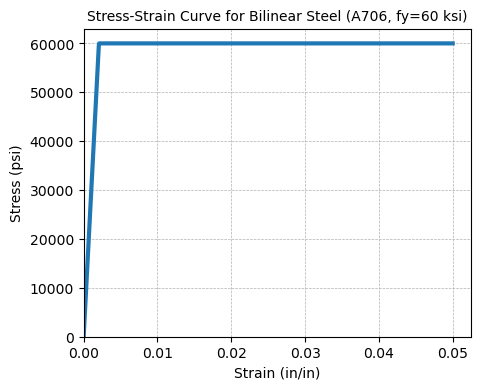

In [3]:
# Plot steel stress-strain curve
eps_steel = np.linspace(0, S60.eps_u-1e-5, 1000)
sigma_steel = S60.stress(eps_steel)

plt.figure(figsize=(5, 4))
plt.plot(eps_steel, sigma_steel, linewidth=3)
plt.xlabel("Strain (in/in)")
plt.ylabel("Stress (psi)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title("Stress-Strain Curve for Bilinear Steel (A706, fy=60 ksi)", fontsize=10)
plt.show()

After defining the section geometry and rebar section, I will add the reinforcement to the section and print the list of the rebars in the section.

In [4]:
# Define concrete section with reinforcement
c_sec = concrete.RectangleReinforcedSection(shape=RECT_20X20, mat=C3, cover=COVER)

# Add transverse reinforcement
c_sec.add_trans_bar(T4)

# Add bottom longitudinal reinforcement
bottomBar = R10
p1 = Point(
    x = c_sec.shape.center.x, 
    y = - c_sec.shape.height/2 + COVER + c_sec.trans_bar_max_dia  + bottomBar.dia/2
)
c_sec.add_long_bar_row(R10, center=p1, direction=(1,0), n=3)

# Add top longitudinal reinforcement
topBar = R10
p2 = Point(
    x = c_sec.shape.center.x, 
    y = c_sec.shape.height/2 - COVER - c_sec.trans_bar_max_dia - topBar.dia/2
)
c_sec.add_long_bar_row(topBar, center=p2, direction=(1,0), n=3)

# Add middle longitudinal reinforcement
midBar = R10S
p3 = Point(
    x = c_sec.shape.center.x,
    y = c_sec.shape.center.y
)
c_sec.add_long_bar_row(midBar, center=p3, direction=(1,0), n=2)

# Print longitudinal bars
for bar in c_sec.long_bars:
    print(bar)

#10 long. rebar at Point(x=0.0, y=-6.865), fy=60000
#10 long. rebar at Point(x=6.865, y=-6.865), fy=60000
#10 long. rebar at Point(x=-6.865, y=-6.865), fy=60000
#10 long. rebar at Point(x=0.0, y=6.865), fy=60000
#10 long. rebar at Point(x=6.865, y=6.865), fy=60000
#10 long. rebar at Point(x=-6.865, y=6.865), fy=60000
#10 long. rebar at Point(x=6.865, y=0.0), fy=60000, skin bar
#10 long. rebar at Point(x=-6.865, y=0.0), fy=60000, skin bar


The rebars seem to be in their correct position. The two last rebars are marked as skin bars since they are placed along the sides of the section as opposed to the bottom or top. This distinction is to facilitate computing the effective tensile ($d$) or compression depth ($d'$) later. Now, I am going to plot the section to double check everything before proceeding with the analysis.

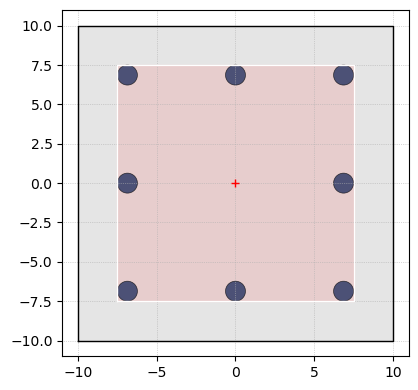

In [5]:
def plot_circle(circle: Circle, ax: matplotlib.axes.Axes = None, **kwargs) -> matplotlib.axes.Axes:        
    circle = plt.Circle(
        (circle.center.x, circle.center.y), 
        circle.radius,
        fill=False if kwargs.get('facecolor') is None else True,
        facecolor=kwargs.get('facecolor'), 
        edgecolor=kwargs.get('edgecolor'),
        linewidth=kwargs.get('linewidth'),
        alpha=kwargs.get('alpha'), 
        zorder=kwargs.get('zorder'),
    )
    ax.add_artist(circle)
    if kwargs.get('centeroid_color') is not None:
        ax.plot(circle.center.x, circle.center.y, marker='o', markersize=1, color=kwargs.get('centeroid_color'))
    ax.set_aspect('equal')
    return ax


def plot_rectangle(rect:Rectangle, ax: axes.Axes, show_centroid:bool=False, **kwargs):
    corners = rect.corners
    corners.append(corners[0]) # Add the first corner again to close the polygon
    corners = [(p.x, p.y) for p in corners] # Convert to tuples
    xs, ys = zip(*corners)
        
    ax.set_aspect('equal')
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)
    ax.tick_params(axis='both', labelsize=kwargs.get('ticksize'))
    ax.plot(xs, ys, color=kwargs.get('edgecolor', 'black'), linewidth=kwargs.get('linewidth', 1))
    if show_centroid:
        ax.plot(rect.center.x, rect.center.y, marker='+', color='red')
    ax.fill(xs, ys, color=kwargs.get('facecolor', 'grey'), alpha=kwargs.get('alpha', 0.2))
    ax.set_aspect('equal')
    return ax
    
    
    

fig, ax = plt.subplots(figsize=(5, 4))

ax = plot_rectangle(c_sec.shape, ax=ax, show_centroid=True)
ax = plot_rectangle(c_sec.core(), ax=ax, facecolor='red', edgecolor='white', alpha=0.1)
for bar in c_sec.long_bars:
    ax = plot_circle(bar.shape, ax=ax, facecolor='#0B1D51', edgecolor='black', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

---

### Pure Flexure Point (F):

It looks like the section and rebars are defined properly. The pink region in the plot highlights the core area of the section confined by the ties, and as shown, all the longitudinal bars are within that region. Now, it is the time to start the analysis. Let's first analyze the section for the pure bending where the normal force is zero. To do so, I assume the bending occurs about the _X-axis_ with the direction of the bending moment oriented in the _negative X-direction_. I use `concrete.UniaixalBending` to perform the analysis.

In [6]:
# Define bending direction
B_DIR = '-x'

# Define beam/column uniaxial bending
beam = concrete.UniaxialBending(c_sec, bending_direction=B_DIR)

The depth of the neutral axis is calculated through an iterative process until force equilibrium is satisfied. The solver configuration is defined as follows:

* The `secant` method is used.
* The minimum and maximum values considered for the neutral axis are $x_0 \cdot h$ and $x_1 \cdot h$, where $h$ is the total depth of the section.
* The iteration is repeated up to `max_iterations` times or until a solution is found within the specified `tolerance`.
* Finally, `n_disc` defines the number of discretizations of the concrete section.

In [7]:
# dEFINE solver configuration
config = concrete.SolverConfig(
    method='secant',
    x0=0.01,
    x1=2.0,
    tolerance=1e-1,
    max_iterations=100,
    n_disc=1000,
)

pure_flexure = beam.solve_neutral_depth_equilibrium(external_force=Nu, config=config)

neutral_depth = pure_flexure['neutral_depth'][0]
force = pure_flexure['force'][0]
moment =pure_flexure['moment'][0]

print(f"Depth of neutral axis: {neutral_depth:.3f} in")
print(f"Axial force: {force/1e3:.0f} kips")
print(f"Bending moment about X-axis: {moment/1e3/12:.0f} kip-ft")

Depth of neutral axis: 5.615 in
Axial force: -0 kips
Bending moment about X-axis: 363 kip-ft


 ---
 
 Let's then calculate the effective depth of the tensile and compressive rebars. For a section with single layer of tensile and compressive rebars, they are calculated as

$$\begin{align*}
&d=h-cover-d_{bv}-\tfrac{1}{2}d_{bt}\\
\\
&d'=cover+d_{bv}+\tfrac{1}{2}d_{bc}
\end{align*}$$

where $d_{bv}$, $d_{bc}$, and $d_{bt}$ are the diameter of the transverse, compressive, and tensile rebars, respectively. If there are multiple layers of rebars at the top or bottom, first we need to compute the centroid of the tensile and compressive rebar group

$$\begin{align*}
\bar{y}_{st} &= \frac{\sum A_{st,i} \cdot y_{st,i}}{\sum A_{st,i}}\\
\\
\bar{y}_{sc} &= \frac{\sum A_{sc,i} \cdot y_{sc,i}}{\sum A_{sc,i}}
\end{align*}$$

where 

- $\bar{y}_{st}$ and $\bar{y}_{sc}$ are the depth of the centroid of the tensile and compressive rebar relative to the section centroid
- $y_{st,i}$ and $y_{sc,i}$ are the depth of the tensile and compressive reinforcement, excluding the side rebars, relaitve to the section centroid
- $A_{st,i}$ and $A_{sc,i}$ are the area of tensile and compressive reinforcement, excluding the side rebars

Note that the bars locaed at each side of the section does not contribute to the centroid calculation. Also, the tensile and compressive rebars are determined based on the depth of the neutral axis. The section centroid is the centroid of the gross cross section. 

Having centroid of the tensile and compressive reinforcement, the The tensile and compressive effective depth are calculated as

$$\begin{align*}
&d=h-cover-d_{bv}-\left(h/2 + |\bar{y}_{st}|\right)\\
\\
&d'=cover+d_{bv}+\left(h/2-|\bar{y}_{sc}|\right)
\end{align*}$$

For the given section, knowing that the neutral axis depth, the tensile and compressive effective depth is obtained as follows.

In [8]:
# Compute the effective depth of the compressive and tensile reinforcement
print(f"Tensile effective depth: {beam.get_tensile_effective_depth(neutral_depth).round(3)} in")
print(f"Compressive effective depth: {beam.get_compressive_effective_depth(neutral_depth).round(3)} in")

Tensile effective depth: 16.865 in
Compressive effective depth: 3.135 in


---

Knowing the depth of the neutral axis, the strain, stress, force in the rebars can also be calculated as explained in the earlier section. 

In [9]:
y_s = beam.get_long_bar_depth()
eps_s = beam.get_rebar_strain(neutral_depth)
sigma_s = beam.get_rebar_stress(neutral_depth)
f_s = beam.get_rebar_force(neutral_depth)

y_c = beam.get_concrete_strip_depth(n_disc=1000)
eps_c = beam.get_concrete_strain(neutral_depth, n_disc=1000)
sigma_c = beam.get_concrete_stress(neutral_depth, n_disc=1000)
f_c = beam.get_concrete_force(neutral_depth,n_disc=1000)

In [10]:
rebar_pure_flexure = pd.DataFrame({
    'y_s_inch': y_s.flatten(),
    'ε_s': eps_s.flatten(),
    'σ_s_psi': sigma_s.flatten(),
    'f_s_lb': f_s.flatten(),
})

rebar_pure_flexure

,y_s_inch,ε_s,σ_s_psi,f_s_lb
0,-6.865,0.006011,60000.000000,76006.121865
1,-6.865,0.006011,60000.000000,76006.121865
2,-6.865,0.006011,60000.000000,76006.121865
3,6.865,-0.001325,-38421.520784,-48671.179849
4,6.865,-0.001325,-38421.520784,-48671.179849
5,6.865,-0.001325,-38421.520784,-48671.179849
6,0.000,0.002343,60000.000000,76006.121865
7,0.000,0.002343,60000.000000,76006.121865


Inspecting the stess and strain results for the reinforcement shows that at the balance point, both the bottom and middle layers of rebar ($y=0.0$ and $y=-6.865$) attain yield strength, while the top layer at $y=6.865$ remains linear.

Next, I will compute the total forces in the steel and concrete and examine the force equilibrium.

In [11]:
# Compute total concrete force
f_ct = f_c.sum()

# Compute centroid of concrete forces
y_ct = np.sum(y_c * f_c) / f_ct if f_ct != 0 else None

# Compute total tensile rebar force
mask_st = f_s > 0
f_st = f_s[mask_st].sum()

# Compute centroid of tensile rebar forces
y_st = np.sum(y_s[mask_st] * f_s[mask_st]) / f_st if f_st != 0 else None

# Compute total compressive rebar force
mask_sc = f_s < 0
f_sc = f_s[mask_sc].sum()

# Compute centroid of compressive rebar forces
y_sc = np.sum(y_s[mask_sc] * f_s[mask_sc]) / f_sc if f_sc != 0 else None

print(f"Total concrete force: {f_ct/1e3:.2f} kips at {y_ct:.2f} in")
print(f"Total compressive rebar force: {f_sc/1e3:.2f} kips at {y_sc:.2f} in")
print(f"Total tensile rebar force: {f_st/1e3:.2f} kips at {y_st:.2f} in")

# The following should be close to zero to satisfy equilibrium
print(f"\nTotal normal force (f_ct + f_sc + f_st): {(f_ct + f_sc + f_st)/1e3:.2f} kips")

# Calculate location of resultant concrete compressive force from α=½ß1.c
# This should match y_ct obtained above
if B_DIR == '-x':
    c_force_depth = c_sec.shape.y_max - c_sec.mat.beta_1 * neutral_depth/2
elif B_DIR == 'x':
    c_force_depth = c_sec.shape.y_min + c_sec.mat.beta_1 * neutral_depth/2
elif B_DIR == '-y':
    c_force_depth = c_sec.shape.x_max - c_sec.mat.beta_1 * neutral_depth/2
elif B_DIR == 'y':
    c_force_depth = c_sec.shape.x_min + c_sec.mat.beta_1 * neutral_depth/2
else:
    raise ValueError("Bending direction must be '-x', 'x', '-y', or 'y'.")

print(f"\nDepth of concrete resultant compressive force: {c_force_depth:.2f} in")

# Calculate curvature at ultimate stage (ε_cu = 0.003) using the secant method
curvature = -c_sec.mat.eps_u / neutral_depth

print(f"\nCurvature: {curvature:.2e} in/in")

Total concrete force: -234.10 kips at 7.64 in
Total compressive rebar force: -146.01 kips at 6.87 in
Total tensile rebar force: 380.03 kips at -4.12 in

Total normal force (f_ct + f_sc + f_st): -0.09 kips

Depth of concrete resultant compressive force: 7.61 in

Curvature: 5.34e-04 in/in


The internal forces are in equilibrium, as expected. To facilitate checking the state of strain, stress, and forces in the section, I will plot them side by side for visual comparison.

In [12]:
def plot_section_strain(direction:str, y:list[np.ndarray], eps:list[np.ndarray], ax:axes.Axes, **kwargs):
    c = kwargs.get('c', ['#1B56FD', '#EB5B00'])
    lw = kwargs.get('lw', [2, 0.5])
    
    max_strain = max(eps[0].max(), eps[1].max())
    min_strain = min(eps[0].min(), eps[1].min())
    abs_max_strain = max(abs(min_strain), abs(max_strain))
    
    if direction in ['y', '-y']:
        x_val, y_val = y, eps
        ax.set_ylim(-1.25*abs_max_strain, 1.25*abs_max_strain)
        ax.set_ylabel('Strain (in/in)')
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    elif direction in ['x', '-x']:
        x_val, y_val = eps, y
        ax.set_xlim(-1.25*abs_max_strain, 1.25*abs_max_strain)
        ax.set_xlabel('Strain (in/in)')
        ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
    else:
        raise ValueError("bending_direction must be 'x', '-x', 'y', or '-y'.")
        
    
    ax.plot(x_val[0], y_val[0], c=c[0], linewidth=lw[0], label='Concrete')
    ax.scatter(x_val[1], y_val[1], s=kwargs.get('s', 50), marker='o', c=c[1], edgecolor=kwargs.get('ec', 'black'), linewidth=lw[1], alpha=kwargs.get('alpha', 0.75), label='Rebar')
    
    ax.axhline(0, color='black', linewidth=0.5, linestyle='-')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='-')

    ax.set_title('Strain Distribution', fontsize=10)
    ax.legend(fontsize=8, frameon=False)
    ax.grid(True, linestyle=':')
    
    return ax
    
    
def plot_section_stress(direction:str, y:list[np.ndarray], sigma:list[np.ndarray], ax:list[axes.Axes], **kwargs):
    c = kwargs.get('c', ['#1B56FD', '#EB5B00'])
    lw = kwargs.get('lw', [2, 0.5])
    
    if len(ax) != len(sigma):
        raise ValueError("Length of ax must match length of sigma.")
    
    # Convert stress from psi to ksi for plotting
    sigma = [s/1e3 for s in sigma]  # Convert psi to ksi
    
    if direction in ['y', '-y']:
        x_val, y_val = y, sigma
    elif direction in ['x', '-x']:
        x_val, y_val = sigma, y
    else:
        raise ValueError("bending_direction must be 'x', '-x', 'y', or '-y'.")
    
    ax[0].plot(x_val[0], y_val[0], c=c[0], linewidth=lw[0], label='Concrete')
    ax[0].set_title('Concrete Stress', fontsize=10)
    
    ax[1].scatter(x_val[1], y_val[1], s=kwargs.get('s', 50), c=c[1], edgecolor=kwargs.get('ec', 'black'), linewidth=lw[1], alpha=kwargs.get('alpha', 0.75), label='Rebar')
    ax[1].set_title('Rebar Stress', fontsize=10)
    
    for i in range(len(ax)):
        min_stress = sigma[i].min()
        max_stress = sigma[i].max()
        abs_max_stress = max(abs(min_stress), abs(max_stress))
        
        if direction in ['y', '-y']:
            ax[i].set_ylim(-1.25*abs_max_stress, 1.25*abs_max_stress)
            ax[i].set_ylabel('Stress (ksi)')
        elif direction in ['x', '-x']:
            ax[i].set_xlim(-1.25*abs_max_stress, 1.25*abs_max_stress)
            ax[i].set_xlabel('Stress (ksi)')
            
        ax[i].axhline(0, color='black', linewidth=0.5, linestyle='-')
        ax[i].axvline(0, color='black', linewidth=0.5, linestyle='-')
        ax[i].grid(True, linestyle=':')
    
    return ax
    
    
def plot_section_force(direction:str, y:list[np.ndarray], f:list[np.ndarray], ax:axes.Axes, **kwargs):
    c = kwargs.get('c', ['#1B56FD', '#EB5B00','#EB5B00'])

    f = [force / 1e3 for force in f]  # Convert force from lb to kips
    f_max = max(abs(value) for value in f if value is not None)
    
    arrowprops = {
        "head_width": 1,
        "length_includes_head": True,
    }

    if direction in ['y', '-y']:
        for i, (yi, fi) in enumerate(zip(y, f)):
            if direction == '-y':
                offset = -0.15 * yi if i==0 else 0.15 * yi
            else:
                offset = 0.15 * yi if i==0 else -0.15 * yi
                
            if yi is not None and fi is not None:
                ax.arrow(yi, 0, 0, fi, color=c[i], head_length=0.1*f_max, **arrowprops)
                ax.text(yi + offset, 0.5*fi, f"{fi:.0f} kips", fontsize=10, ha='center', va='center', rotation=90)
                
        ax.set_ylim(-1.25*f_max, 1.25*f_max)
        ax.set_ylabel('Normal Force (kips)')
        
    elif direction in ['x', '-x']:
        for i, (yi, fi) in enumerate(zip(y, f)):
            if direction == '-x':
                offset = 0.15 * yi if i==0 else -0.15 * yi
            else:
                offset = -0.15 * yi if i==0 else 0.15 * yi
                
            if yi is not None and fi is not None:
                ax.arrow(0, yi, fi, 0, color=c[i], head_length=0.1*f_max, **arrowprops)
                ax.text(0.5*fi, yi + offset, f"{fi:.0f} kips", color=c[i], fontsize=10, fontweight='bold', ha='center', va='center')
                
        ax.set_xlim(-1.25*f_max, 1.25*f_max)
        ax.set_xlabel('Normal Force (kips)')
    
    ax.axhline(0, color='black', linewidth=0.5, linestyle='-')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='-')
    
    ax.set_title('Normal Force Distribution', fontsize=10)
    # ax.legend(fontsize=8, frameon=False)
    ax.grid(True, linestyle=':')
    
    return ax

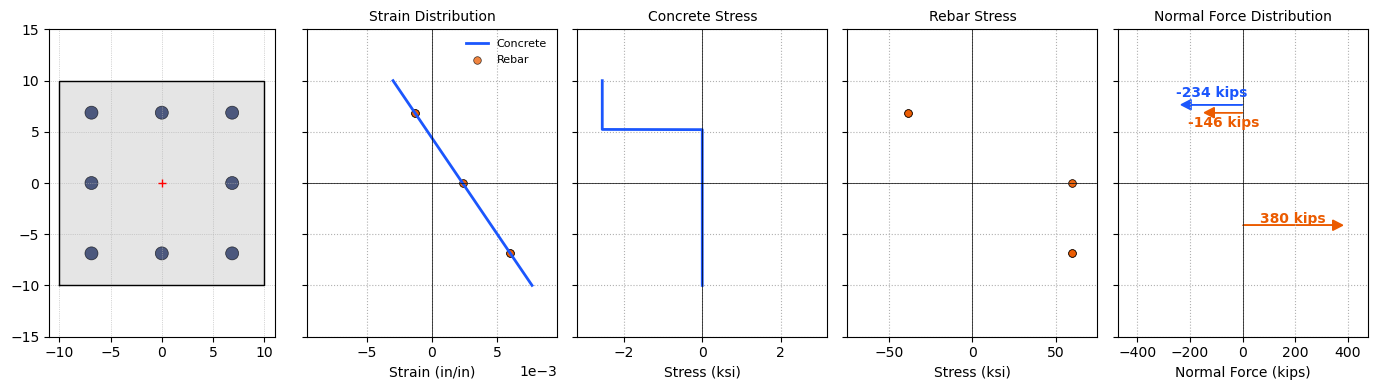

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(14, 4), sharey=True)

ax[0] = plot_rectangle(c_sec.shape, ax=ax[0], bar_facecolor='black', show_centroid=True)
for bar in c_sec.long_bars:
    ax[0] = plot_circle(bar.shape, ax=ax[0], facecolor='#0B1D51', edgecolor='black', linewidth=0.5, alpha=0.7)
ax[1] = plot_section_strain(B_DIR, [y_c, y_s], [eps_c, eps_s], ax[1], s=30)
ax[2:4] = plot_section_stress(B_DIR, [y_c, y_s], [sigma_c, sigma_s], ax[2:4], s=30)
ax[4] = plot_section_force(B_DIR, [y_ct, y_sc, y_st], [f_ct, f_sc, f_st], ax=ax[4])


for a in ax:
    if B_DIR in ['y', '-y']:
        a.set_xlim(1.5*c_sec.shape.x_min, 1.5*c_sec.shape.x_max)
    elif B_DIR in ['x', '-x']:
        a.set_ylim(1.5*c_sec.shape.y_min, 1.5*c_sec.shape.y_max)

plt.tight_layout()
plt.show()

## Compute Special Points

In [14]:
# Calculate special points in the interaction diagram
special_points = {
    'Pure Compression': concrete.nominal_compressive_strength(c_sec), # negative
    'Max Nominal Compression': concrete.max_nominal_compressive_strength(c_sec), # negative
    'Decompression': beam.get_decompression_point(external_force=Nu, n_disc=1000),
    'Balance': beam.get_balance_point(external_force=Nu, n_disc=1000),
    'Tension-Controlled': beam.get_tension_controlled_point(external_force=Nu, n_disc=1000),
    'Pure Flexure': beam.get_pure_flexure_point(Nu, config),
    'Pure Tension': concrete.nominal_tensile_strength(c_sec) # positive
}

In [15]:
# Constants for unit conversions
LB_TO_KIPS = 1e3
LB_IN_TO_KIP_FT = 12e3
ROUNDING_PRECISION = {
    'neutral_depth_in': 3,
    'p_kips': 0,
    'm_kip_ft': 0
}

# Create DataFrame with special points
sp_df = pd.DataFrame(special_points).T
sp_df.columns = ['neutral_depth_in', 'p_kips', 'm_kip_ft']

# Convert values to float and apply unit conversions
sp_df = sp_df.astype(float)
sp_df['p_kips'] /= LB_TO_KIPS 
sp_df['m_kip_ft'] /= LB_IN_TO_KIP_FT
sp_df = sp_df.round(ROUNDING_PRECISION)

sp_df

,neutral_depth_in,p_kips,m_kip_ft
Pure Compression,-inf,-1602.0,0.0
Max Nominal Compression,-inf,-1282.0,0.0
Decompression,16.865,-1033.0,297.0
Balance,9.981,-421.0,462.0
Tension-Controlled,6.324,-75.0,387.0
Pure Flexure,5.615,-0.0,363.0
Pure Tension,inf,608.0,0.0


The `Max Nominal Compression` point is corresponding to 0.8 of `Pure Compression` per ACI 318-25 §22.4.2.1. Note that at `Pure Tension`, `Pure compression`, and  `Max Nominal Compression` points, the strain profile never becomes zero. Thus, the `neutral_depth_in` for these points are `inf` or `-inf`. 

---

### Strength Reduction Factor $\phi$

The strength reduction factor, $\phi$, for combined moment and axial force is computed per ACI 318-25 §21.2.2. It depends on the magnitude of the strain in the extreme tensile rebars and the type of transverse bars (i.e., spiral or tie). Let's obtain the $\phi$ values for the special points.

In [16]:
phi_sp = concrete.get_bending_reduction_factor(beam, sp_df['neutral_depth_in'].values).round(2)
sp_df['phi'] = phi_sp

sp_df

,neutral_depth_in,p_kips,m_kip_ft,phi
Pure Compression,-inf,-1602.0,0.0,0.65
Max Nominal Compression,-inf,-1282.0,0.0,0.65
Decompression,16.865,-1033.0,297.0,0.65
Balance,9.981,-421.0,462.0,0.65
Tension-Controlled,6.324,-75.0,387.0,0.89
Pure Flexure,5.615,-0.0,363.0,0.90
Pure Tension,inf,608.0,0.0,0.90


Moving from `Pure Compression` point to `Pure Tension` point, as the compression force reduces the failure mode becomes more ductile, and per ACI 318-25 §21.2.2 the strength reduction factor increases from 0.65 to 0.90. The `Tension-Controlled` point is where the $\phi$ starts to reduce. There is a _transition zone_ between the `Tension-Controlled` and `Balance` point where $\phi$ linearly reduced from 0.90 to 0.65.

---

## ETABS Section Designer

To verify my computation I used the ETABS Section Desginer. The steps to define the column section are as follows:

1. Define rebar and concrete material properties by going to `Define\Material Properties...`. Then click on `Add New Material...`, and define the concrete and rebar properties as shown in the following screenshots.

<div style="text-align: center">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_10.png" height=300 alt="Frame properties">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_11.png" height=300 alt="Section Designer">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_12.png" height=300 alt="Section Designer Property Data">
</div>

2. Next, define the section by going to `Define\Section Properties\Frame Sections...`. In the "Section Properties" window, click on `Add New Property...`, and set "Section Shape: Concrete Rectangular" then click on `Section Designer`under "Special". A new window will pop up which allows you to define the property data for the section. Use the following setup:

    * Property Name: 
    * Base Material: 3000Psi
    * Design Type: Concrete Column
    * Concrete Column Check/Design: reinforcement to be checked

Then click on `Section Designer...`.

<div style="text-align: center">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_20.png" height=400 alt="Frame properties">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_21.png" height=400 alt="Frame properties">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_22.png" height=400 alt="Frame properties">
</div>

In the "Section Designer" window, click on the <img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_icon_01.png" height=30 alt="Draw rectangle icon">, and from the menu click on `Draw Rectangle`. Click on the origin to place the rectangle, then right click on the rectangle and edit the dimensions and add rebars as shown in the screenshot below.

<div style="text-align: center">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_23.png" height=400 alt="Draw rectangle">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_24.png" height=400 alt="Edit section properties">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_25.png" height=400 alt="Edit section properties">
</div>

Once modifications are complete, click the <img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_icon_02.png" height="30" alt="Interaction surface icon"> icon to navigate to the "Interaction Surface" window. In this window, you can select the curve type (e.g., Design Code Data or Fiber Model Data), choose the surface from the 3D visualization windows, and examine the 2D plot of the P-M interaction curve. The curve data is also available in a table format, which I will transfer into this notebook for comparison with my results. Since compression forces are considered negative, I must multiply all ETABS axial force results by -1 for consistency.

<div style="text-align: center">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_26.png" height=400 alt="Column section">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_30.png" height=400 alt="Interaction surface: Code data include phi">
<img src="../../../assets/img/structure/concrete/force_moment_interaction/force_moment_interaction_32.png" height=400 alt="Interaction surface: Code data exclude phi and fiber data">
</div>

In [17]:
# ETABS results

# Code data, phi excluded
p_etabs = -np.array([1282.954, 1282.954, 1119.234, 925.994, 700.395, 421.321, 253.407, 31.243, -146.445, -483.543, -609.6])
m_etabs = [0, 181.3703, 262.8628, 335.456, 398.7719, 462.9059, 430.9659, 376.8626, 285.7061, 88.6048, 0]

# Code data, phi included
phi_p_etabs = -np.array([833.92, 833.92, 727.502, 601.896, 455.257, 273.859, 191.475, 28.118, -131.8, -435.189, -548.64])
phi_m_etabs = [0, 117.8907, 170.8608, 218.0464, 259.2017, 300.8888, 325.6393, 339.1764, 257.1355, 79.7443, 0]

# Fiber data
p_fiber_etabs = -np.array([1603.692, 1170.638, 995.709, 883.565, 689.574, 384.072, 298.361, 143.413, -133.5, -570.081, -609.6])
m_fiber_etabs = [0, 274.7825, 347.2369, 377.7813, 418.539, 474.9512, 457.6552, 422.114, 269.3691, 22.608, 0]

etabs_df = pd.DataFrame({
    'p_fiber_kips': p_fiber_etabs,
    'p_kips': p_etabs,
    'phi_p_kips': phi_p_etabs,
    'm_fiber_kip_ft': m_fiber_etabs,
    'm_kip_ft': m_etabs,
    'phi_m_kip_ft': phi_m_etabs
})

etabs_df

,p_fiber_kips,p_kips,phi_p_kips,m_fiber_kip_ft,m_kip_ft,phi_m_kip_ft
0,-1603.692,-1282.954,-833.920,0.0000,0.0000,0.0000
1,-1170.638,-1282.954,-833.920,274.7825,181.3703,117.8907
2,-995.709,-1119.234,-727.502,347.2369,262.8628,170.8608
3,-883.565,-925.994,-601.896,377.7813,335.4560,218.0464
4,-689.574,-700.395,-455.257,418.5390,398.7719,259.2017
5,-384.072,-421.321,-273.859,474.9512,462.9059,300.8888
6,-298.361,-253.407,-191.475,457.6552,430.9659,325.6393
7,-143.413,-31.243,-28.118,422.1140,376.8626,339.1764
8,133.500,146.445,131.800,269.3691,285.7061,257.1355
9,570.081,483.543,435.189,22.6080,88.6048,79.7443


I will plot the interaction diagram for these results momentarily. But, first let's generate the data that I need to plot P-M diagram using the algorithm that I developed so far.

---

## P-M Diagram

To generate the points required to plot the P-M interaction diagram, in addition to the critical points obtained earlier, I calculate some intermediary points to increase the accuracy of the plot. To accomplish this, I calculate the internal forces (P) and internal moments (M) at a certain neutral axis depth ranging from `min_neutral_depth` to `max_neutral_depth` with the total number of `n_points` pairs of (P, M). The process to calculate the P and M is shown in the diagram below.



In [18]:
yn, p, m = concrete.generate_force_moment_interaction(
    beam, 
    min_neutral_depth = 0.1 * beam.section_height(),
    max_neutral_depth = 1.1 * beam.section_height(),
    n_points=100,
    n_disc=1000
)


I also need the $\phi$-factor based on the strain in extreme tensile rebars.

In [19]:
# Compute the bending reduction factor, phi, for the generated points
phi = concrete.get_bending_reduction_factor(beam, yn)

since the code limits the compression strength due to accidental eccentrocity, I need to cut off the diagram after the maximum nominal axial strength, $P_{n,max}$. Thus, I obtain the closest value to $P_{n,max}$ within the generated data and stop the curve at the point.

In [20]:
# Find the index where f is closest to P_n_max
p_nmax_idx = np.argmin(np.abs(p - special_points['Max Nominal Compression']['force']))

# Splitting the data into two parts: before and after P_n_max, and converting to kips and kip-ft
phi_pre = phi[:p_nmax_idx]
phi_post = phi[p_nmax_idx:]
p_pre = p[:p_nmax_idx]/1e3 # convert force from lb to kips
p_post = p[p_nmax_idx:]/1e3 
m_pre = m[:p_nmax_idx]/12e3 # convert moment from lb-in to kip-ft
m_post = m[p_nmax_idx:]/12e3

I also, calculate the moment corresponding to $P_{n,max}$ through the interative process that I mentioned earlier. To do so, I define the external force to be equal to $P_{n,max}$, and Iexpect to get the total force to be close to zero after solving the equilibrium equation.

In [21]:
print(f"External force at Max Nominal Compression: {special_points['Max Nominal Compression']['force'][0]/1e3:.0f} kips")

max_nominal = beam.solve_neutral_depth_equilibrium(external_force=special_points['Max Nominal Compression']['force'], config=config)

print(f"Depth of neutral axis at Max Nominal Compression: {max_nominal['neutral_depth'][0, 0]:.3f} in")
print(f"Total force at Max Nominal Compression: {max_nominal['force'][0]/1e3:.0f} kips")
print(f"Total moment at Max Nominal Compression: {max_nominal['moment'][0]/1e3/12:.0f} kip-ft")

External force at Max Nominal Compression: -1282 kips
Depth of neutral axis at Max Nominal Compression: 20.808 in
Total force at Max Nominal Compression: 1 kips
Total moment at Max Nominal Compression: 182 kip-ft


---

## Comaparison

Now, it's time to plot the results and compare.

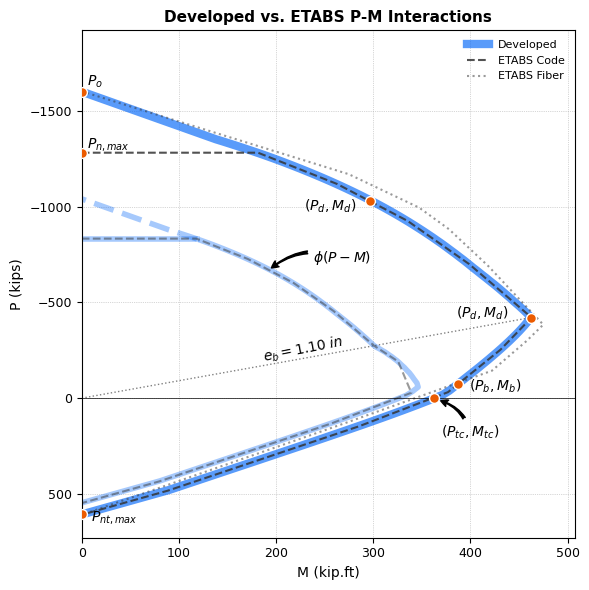

In [144]:
# Define labels for special points
labels = [
    r'$P_{o}$',
    r'$P_{n,max}$',
    r'$(P_{d}, M_{d})$',
    r'$(P_{b}, M_{b})$',
    r'$(P_{tc}, M_{tc})$',
    r'$(P_{f}, M_{f})$',
    r'$P_{nt,max}$'
]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# ---Plot unfactored P-M interaction curves---
# Developed
ax.plot(m/12e3, p/1e3, linewidth=6, color='#0065F8', alpha=0.65, label='Developed')
# ETABS
ax.plot(m_etabs, p_etabs, linestyle='--', linewidth=1.5, color="#343434", alpha=0.85, label='ETABS Code')
# ETABS fiber
ax.plot(m_fiber_etabs, p_fiber_etabs, linestyle=':', linewidth=1.5, color="#343434", alpha=0.50, label='ETABS Fiber')
# Special points
ax.scatter(sp_df['m_kip_ft'], sp_df['p_kips'], color='#EB5B00', edgecolor='white', s=50, zorder=10)
# Draw line from origin to balance point
ax.plot([0, sp_df.loc['Balance', 'm_kip_ft']], [0, sp_df.loc['Balance', 'p_kips']], linestyle=':', linewidth=1, color='grey')

# ---Plot factored P-M interaction curves---
# Developed
ax.plot(phi_pre * m_pre, phi_pre * p_pre, linewidth=4, color='#0065F8', alpha=0.35)
ax.plot(phi_post * m_post, phi_post * p_post, linestyle='--', linewidth=4, color='#0065F8', alpha=0.35)
# Draw hiroizontal line at P_nmax
ax.plot([0, phi[p_nmax_idx] * m[p_nmax_idx]/12e3], [phi[p_nmax_idx] * p[p_nmax_idx]/1e3]*2, linewidth=4, color='#0065F8', alpha=0.35)
# ETABS
ax.plot(phi_m_etabs, phi_p_etabs, linestyle='--', linewidth=1.5, color="#343434", alpha=0.50)


ax.set_xlabel('M (kip.ft)', loc='center', fontsize=10)
ax.set_ylabel('P (kips)', fontsize=10)
ax.set_title('Developed vs. ETABS P-M Interactions', fontsize=11, fontweight='bold')
ax.legend(fontsize=8, frameon=False, loc='upper right')

ax.invert_yaxis()

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)

x_max = 1.1*m.max()/12e3
ax.set_xlim(left=0, right=x_max)
y_max = 1.2*p.min()/1e3
y_min = 1.2*p.max()/1e3
ax.set_ylim(bottom=y_min, top=y_max)

ax.axhline(0, color='black', linewidth=0.5, linestyle='-')
# Set the position of the axes spines to cross at the origin
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.xaxis.set_ticks_position('bottom')
# ax.xaxis.set_label_position('bottom')

# --- Annotate special points ---
# Pure Compression
ax.annotate(labels[0], xy=(sp_df.iloc[0, 2]+5, 1.02*sp_df.iloc[0, 1]), fontsize=10) 
# Max Nominal Compression
ax.annotate(labels[1], xy=(sp_df.iloc[1, 2]+5, 1.02*sp_df.iloc[1, 1]), fontsize=10)
# Decompression
ax.annotate(labels[2], xy=(0.95*sp_df.iloc[2, 2], 0.95*sp_df.iloc[2, 1]), fontsize=10, ha='right')
# Balance
ax.annotate(labels[2], xy=(0.95*sp_df.iloc[3, 2], 1.0*sp_df.iloc[3, 1]), fontsize=10, ha='right')
# Tension-Controlled
ax.annotate(labels[3], xy=(1.03*sp_df.iloc[4, 2], 0.5*sp_df.iloc[4, 1]), fontsize=10)
# Pure Flexure
arrowprops = dict(arrowstyle="fancy,head_length=.5,head_width=0.5,tail_width=.2", connectionstyle="arc3,rad=0.3", color="black")
ax.annotate(labels[4], xy=(1.01*sp_df.iloc[5, 2], sp_df.iloc[5, 1]+10), xytext=(1.1*sp_df.iloc[5, 2], sp_df.iloc[5, 1]+200), arrowprops=arrowprops, fontsize=10, ha='center', va='baseline')
# Pure Tension
ax.annotate(labels[-1], xy=(sp_df.iloc[6, 2]+10, 1.05*sp_df.iloc[6, 1]), fontsize=10)

# Calculate and annotate balanced eccentricity
balanced_rotation = np.degrees(np.arctan2(-sp_df.iloc[3, 1], sp_df.iloc[3, 2])) * abs(x_max / y_max)
balanced_ecc = np.abs(sp_df.iloc[3, 2]/sp_df.iloc[3, 1])
ax.annotate(rf"$e_b={balanced_ecc:.2f}\ in$", xy=(0.4*sp_df.iloc[3, 2], 0.4*sp_df.iloc[3, 1]-20), rotation=balanced_rotation, fontsize=10)

# Annotate phi(P-M)
phi_d = sp_df.iloc[2, 3]
p_d = sp_df.iloc[2, 1]
m_d = sp_df.iloc[2, 2]
arrowprops = dict(arrowstyle="fancy,head_length=.5,head_width=0.5,tail_width=.2", connectionstyle="arc3,rad=0.3", color="black")
ax.annotate(rf"$\phi(P-M)$", xy=(phi_d*m_d, phi_d*p_d), xytext=(phi_d*m_d+75, phi_d*p_d-75), arrowprops=arrowprops, fontsize=10, ha='center', va='center_baseline', color='black', zorder=9)

# ax.set_aspect('equal', adjustable='datalim')
ax.grid(True, linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

Comparing the unfactored curves, the ETABS fiber model is slightly overestimated the compression capacity relative to the code, while on the tension side it is slightly underestimated. The devleoped method is in close agreement with the ETABS code predictions in both factored and unfactored capacities. the factored moment at balance point is slightly overpredicted by the developed method compared to ETABS, hoever, the unfactored values are exactly matches.